In [1]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
## directory to all datasets
DATASETS_DIR = "../datasets_text/"
BASE_DIR ="../"
train_dir = os.path.join(BASE_DIR, 'TRAIN')

test_dir =os.path.join(BASE_DIR,'TEST')


In [3]:
datasets = os.listdir(DATASETS_DIR)
del datasets[1]
datasets

['dataset28.txt',
 'dataset10.txt',
 'dataset22.txt',
 'dataset11.txt',
 'dataset13.txt',
 'dataset12.txt',
 'dataset4.txt',
 'dataset5.txt',
 'dataset3.txt',
 'dataset24.txt',
 'dataset26.txt',
 'dataset16.txt',
 'dataset8.txt',
 'dataset20.txt',
 'dataset6.txt',
 'dataset25.txt',
 'dataset1.txt',
 'dataset9.txt',
 'dataset18.txt',
 'dataset7.txt',
 'dataset15.txt',
 'dataset19.txt',
 'dataset27.txt',
 'dataset23.txt',
 'dataset2.txt',
 'dataset17.txt',
 'dataset21.txt',
 'dataset14.txt']

In [4]:
def generate_data(data_list):
    generated_data =np.zeros((2048,28),dtype=complex)
    for i,fname in enumerate(data_list):
        with open(os.path.join(DATASETS_DIR,fname)) as f:
            j=0
            for line in f:
                line = line.strip()
                if line:
                    data = line.split()
                    real_part = data[0]
                    imag_part =data[1]
                    complex_signal = complex(float(real_part),float(imag_part))
                    generated_data[j,i]=complex_signal
                j = j+1
        f.close()
    return generated_data

In [5]:
sample = generate_data(datasets)

In [6]:
sample.shape

(2048, 28)

/home/dronny/anaconda3/envs/tensorflow/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


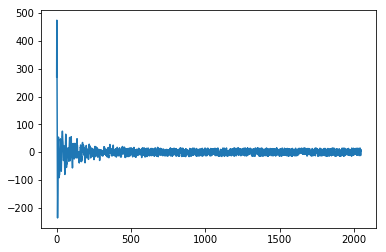

In [7]:
plt.plot(sample[:,20])

In [8]:
#Conversion from time domain to frequency domain
def td_2_fd():
    f_domain = []
    for a in np.arange(sample.shape[1]):
        fft_data =np.fft.fft(sample[:,a])
        f_domain.append(fft_data)
    return np.asarray(f_domain)

In [9]:
fft =td_2_fd()

In [10]:
fd_ffts = fft.T

In [23]:
fd_ffts

array([[-6.15127583e-01 +2.16043645j, -1.17359686e-01 +0.74497748j,
        -4.06257508e-01 +0.57928542j, ...,  4.28208305e-01 +2.45849816j,
        -3.97693791e-01 +4.86400971j, -1.96910636e+00 +4.50262014j],
       [-6.48769651e-01 +2.14975786j,  5.08646804e-04 +0.69464659j,
        -4.33120644e-01 +0.58988764j, ..., -2.07006344e+00 +4.54837063j,
        -3.60087799e-01 +5.15665446j, -1.25138048e+00+10.29417616j],
       [-7.09235743e-01 +2.3057825j , -2.27126318e-02 +0.70028769j,
        -3.92645071e-01 +0.58983257j, ..., -1.55960684e+00 +3.48246591j,
         5.80616907e-02 +5.04884114j, -1.15075317e+00 +7.12638685j],
       ...,
       [-5.91960947e-01 +2.0474541j , -1.57736702e-01 +0.72469572j,
        -3.83554647e-01 +0.51595245j, ..., -7.48668201e-01 +5.35731198j,
        -2.65455970e-01 +5.15219299j, -3.76344590e+00 +5.6324899j ],
       [-6.58030706e-01 +2.03406958j,  6.34261477e-02 +0.63243994j,
        -3.61865693e-01 +0.60006292j, ..., -2.09733641e+00 +3.226285j  ,
       

In [24]:
pd.DataFrame(fd_ffts).to_csv("../MRS_DATASETS.csv")

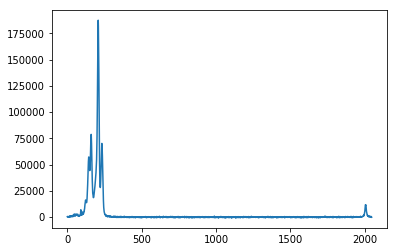

In [12]:
plt.plot((fd_ffts[:,0]))

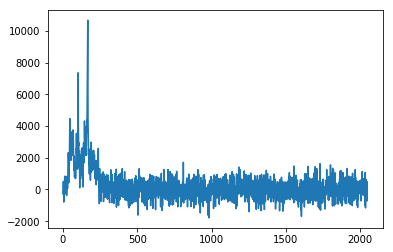

In [13]:
plt.plot(fd_ffts[:,27])

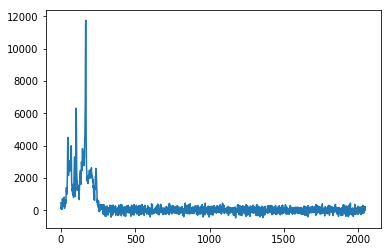

In [14]:
plt.plot(fd_ffts[:,7])

In [15]:
def normalize_ffts(ffts):
    for i in np.arange(ffts.shape[1]):
        ffts[:,i] -= ffts[:,i].mean()
        ffts[:,i] /= ffts.std()
    return ffts

In [16]:
normalized =normalize_ffts(fd_ffts)
normalized.shape

(2048, 28)

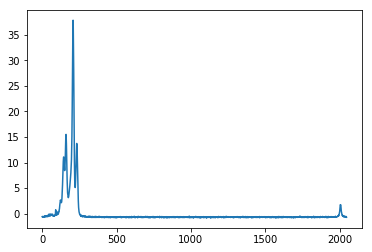

In [17]:
plt.plot(normalized[:,0])

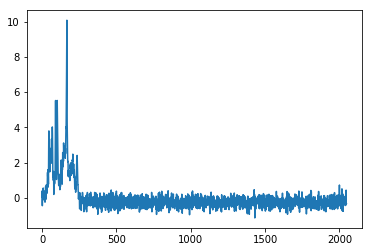

In [18]:
plt.plot(normalized[:,21])

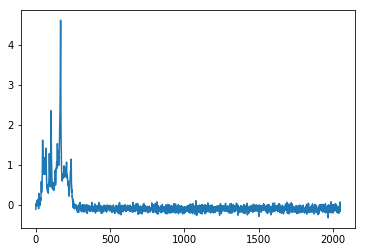

In [19]:
plt.plot(normalized[:,1])

In [20]:
normalized

array([[-6.15127583e-01 +2.16043645j, -1.17359686e-01 +0.74497748j,
        -4.06257508e-01 +0.57928542j, ...,  4.28208305e-01 +2.45849816j,
        -3.97693791e-01 +4.86400971j, -1.96910636e+00 +4.50262014j],
       [-6.48769651e-01 +2.14975786j,  5.08646804e-04 +0.69464659j,
        -4.33120644e-01 +0.58988764j, ..., -2.07006344e+00 +4.54837063j,
        -3.60087799e-01 +5.15665446j, -1.25138048e+00+10.29417616j],
       [-7.09235743e-01 +2.3057825j , -2.27126318e-02 +0.70028769j,
        -3.92645071e-01 +0.58983257j, ..., -1.55960684e+00 +3.48246591j,
         5.80616907e-02 +5.04884114j, -1.15075317e+00 +7.12638685j],
       ...,
       [-5.91960947e-01 +2.0474541j , -1.57736702e-01 +0.72469572j,
        -3.83554647e-01 +0.51595245j, ..., -7.48668201e-01 +5.35731198j,
        -2.65455970e-01 +5.15219299j, -3.76344590e+00 +5.6324899j ],
       [-6.58030706e-01 +2.03406958j,  6.34261477e-02 +0.63243994j,
        -3.61865693e-01 +0.60006292j, ..., -2.09733641e+00 +3.226285j  ,
       